### Airline Satisfaction 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
test = pd.read_csv('./data/test.csv')
train = pd.read_csv('./data/train.csv')

# concatenate data
df = pd.concat([train, test], ignore_index=True)

In [3]:
df.shape

(129880, 25)

In [4]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,70172,5047,110028,24026,119299
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3


In [5]:
# drop non-useful columns
df = df.drop(columns=['Unnamed: 0', 'id'])

In [6]:
# format column headers
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   class                              129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure/arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

In [8]:
# calculate percentage of null values
round(df.isnull().sum()/len(df)*100, 2)

gender                               0.0
customer_type                        0.0
age                                  0.0
type_of_travel                       0.0
class                                0.0
flight_distance                      0.0
inflight_wifi_service                0.0
departure/arrival_time_convenient    0.0
ease_of_online_booking               0.0
gate_location                        0.0
food_and_drink                       0.0
online_boarding                      0.0
seat_comfort                         0.0
inflight_entertainment               0.0
on-board_service                     0.0
leg_room_service                     0.0
baggage_handling                     0.0
checkin_service                      0.0
inflight_service                     0.0
cleanliness                          0.0
departure_delay_in_minutes           0.0
arrival_delay_in_minutes             0.3
satisfaction                         0.0
dtype: float64

In [9]:
# drop null values
df = df.dropna()

In [10]:
df.describe().round(2)

,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00
mean,39.43,1190.21,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.31,3.64,3.29,14.64,15.09
std,15.12,997.56,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,37.93,38.47
min,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,40.00,844.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,51.00,1744.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [11]:
# convert arrival_delay_in_minutes to correct datatype
df.arrival_delay_in_minutes = df.arrival_delay_in_minutes.astype('int64')

### EDA

In [12]:
sns.set_style('darkgrid')

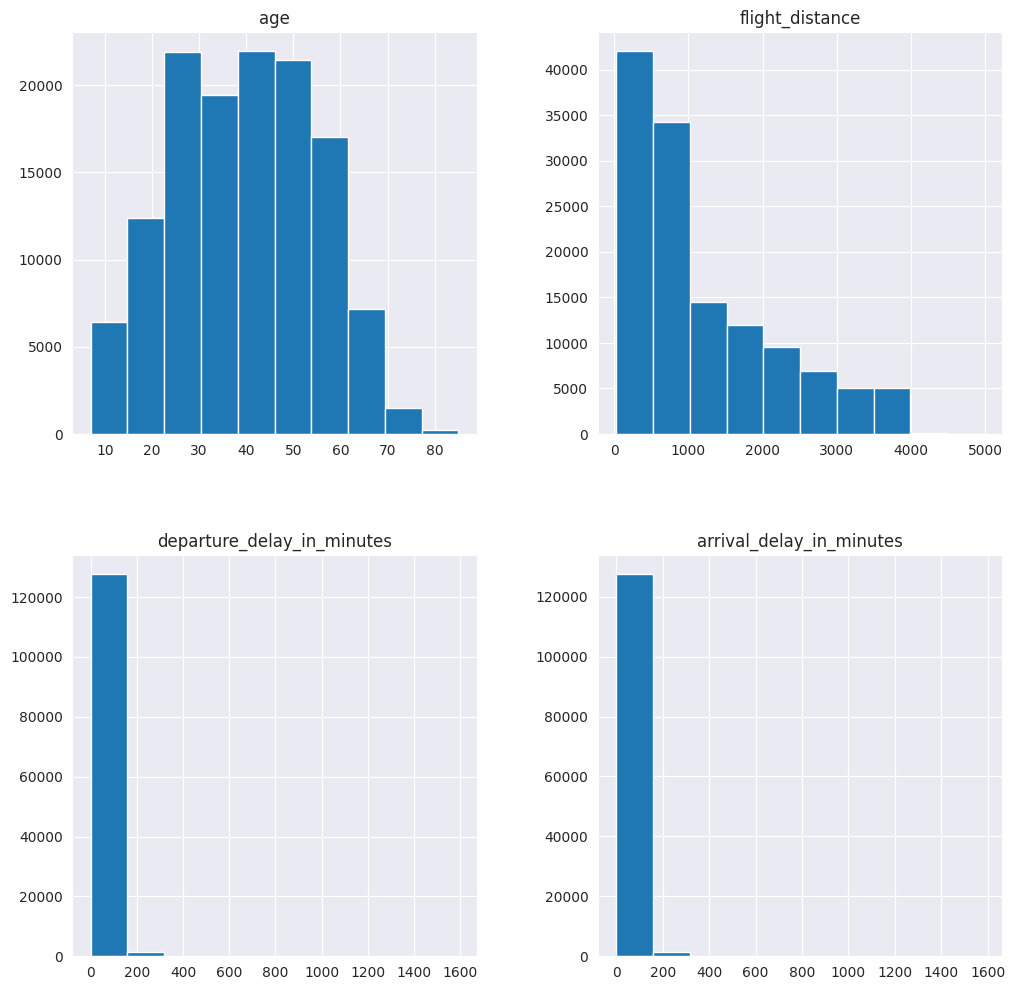

In [13]:
fig = df[['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']].hist(figsize=[12,12]);

Statistics for Arrival Delay In Minutes:
count    56734.000000
mean        34.443279
std         52.062016
min          1.000000
25%          6.000000
50%         17.000000
75%         41.000000
max       1584.000000
Name: arrival_delay_in_minutes, dtype: float64
Statistics for Departure Delay In Minutes:
count    56278.000000
mean        33.692171
std         51.661585
min          1.000000
25%          6.000000
50%         16.000000
75%         40.000000
max       1592.000000
Name: departure_delay_in_minutes, dtype: float64


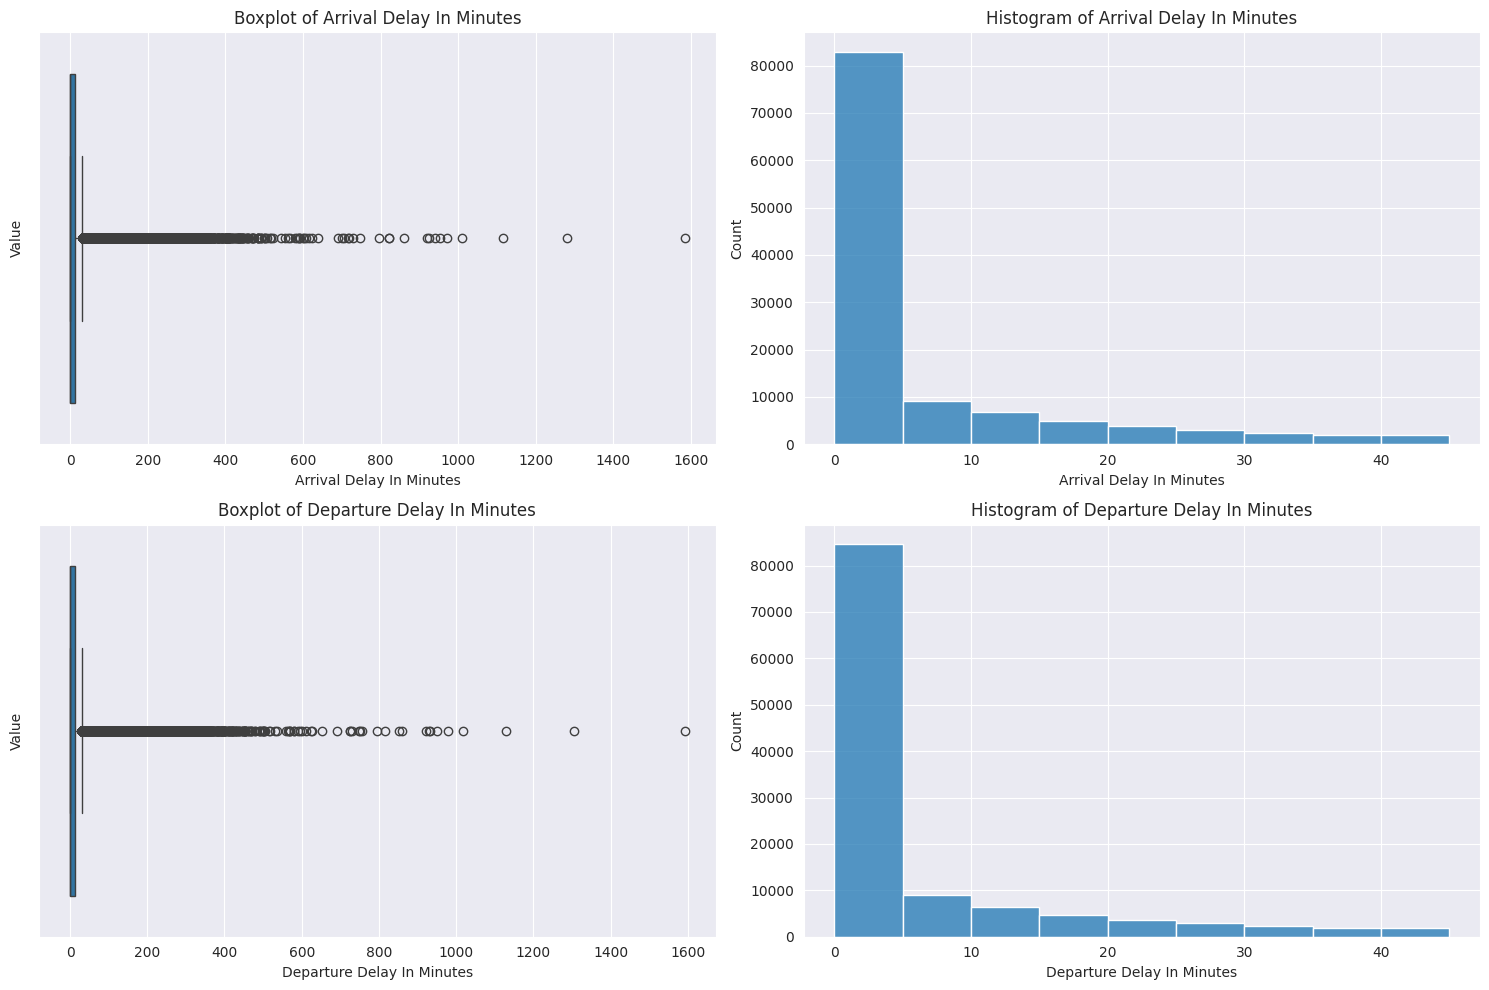

In [14]:
columns = ['arrival_delay_in_minutes', 'departure_delay_in_minutes']
# create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# flatten the axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(columns):
    # print descriptive statistics for non-zero values
    print(f"Statistics for {col.replace('_', ' ').title()}:")
    print(df[col][df[col] != 0].describe())
    print('==========')

    # boxplot
    sns.boxplot(data=df, x=col, ax=axes[2 * i])
    axes[2 * i].set_title(f"Boxplot of {col.replace('_', ' ').title()}")
    axes[2 * i].set_xlabel(col.replace('_', ' ').title())
    axes[2 * i].set_ylabel("Value")

    # histplot
    sns.histplot(data=df, x=col, ax=axes[2 * i + 1], bins=np.arange(0, 50, 5))
    axes[2 * i + 1].set_title(f"Histogram of {col.replace('_', ' ').title()}")
    axes[2 * i + 1].set_xlabel(col.replace('_', ' ').title())
    axes[2 * i + 1].set_ylabel("Count")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [15]:
# seperate into numeric and categegorical column
numeric_columns = df.select_dtypes(include=['int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

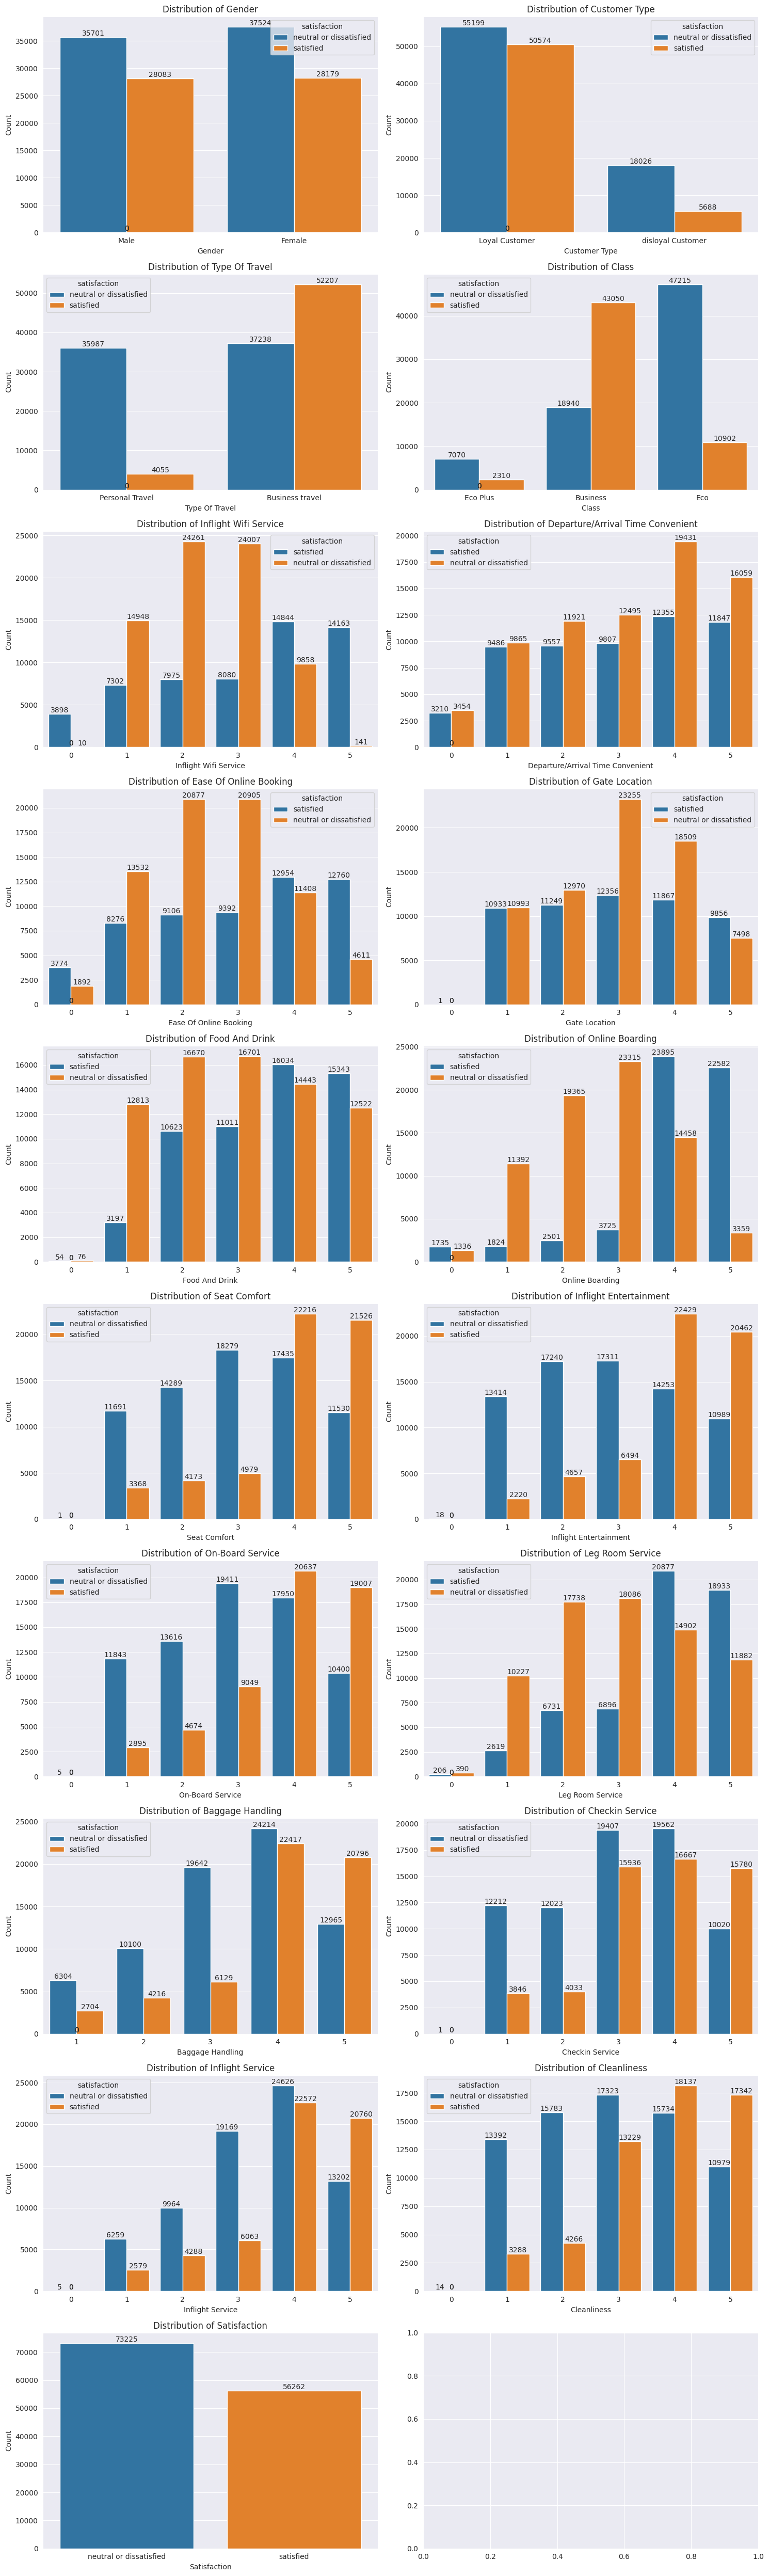

In [16]:

# exclude specific columns
excluded_columns = ['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']
columns = [col for col in df.columns if col not in excluded_columns]

# calculate the number of rows required for 2-column layout
n_rows = int(np.ceil(len(columns) / 2))

# create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, n_rows * 5))

axes = axes.flatten()

for ax, col in zip(axes, columns):
    sns.countplot(data=df, x=col, ax=ax, hue='satisfaction')
    ax.set_title(f"Distribution of {col.replace('_', ' ').title()}")
    ax.set_xlabel(col.replace('_', ' ').title())
    ax.set_ylabel("Count")

   # adding annotations on the bars
    for bar in ax.patches:
        ax.annotate(
            text=int(bar.get_height()) ,
            xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center',
            va='bottom'
        )

# adjust layout for better readability
plt.tight_layout()
plt.show()

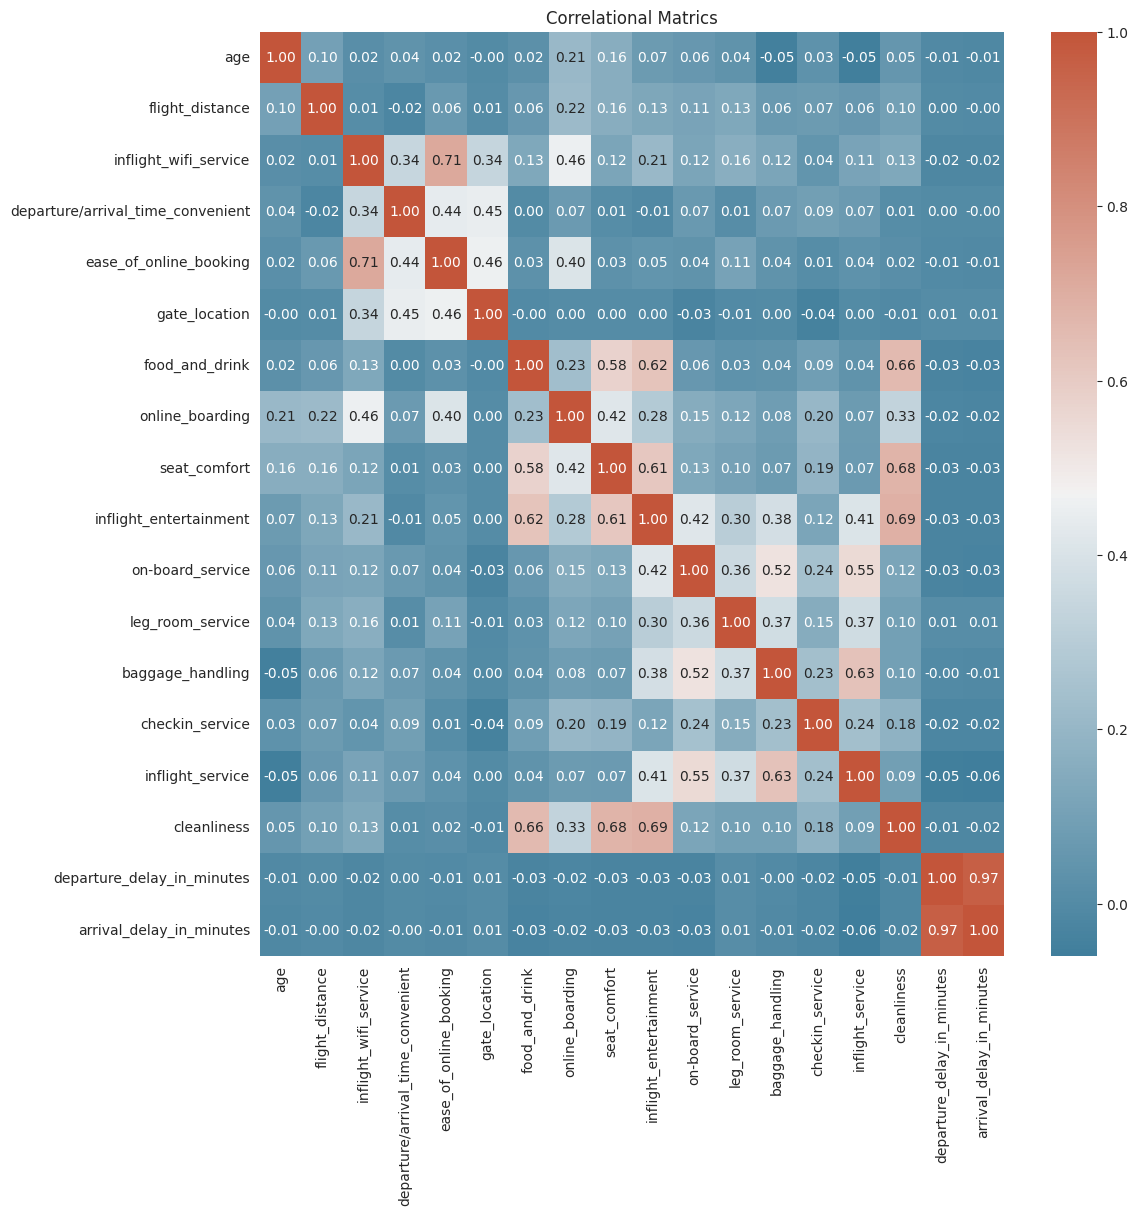

In [17]:
# correlational Matrics
plt.figure(figsize=[12,12])
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df[df.select_dtypes(include=['int64']).columns].corr(), annot=True, cmap=cmap, fmt='.2f')
plt.title('Correlational Matrics');

### Machine Learning

In [18]:
# convert the target column into binary
df['satisfaction'] = (df['satisfaction']== 'satisfied').astype(int)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score,  mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.satisfaction.values
y_val = df_val.satisfaction.values
y_test = df_test.satisfaction.values

del df_train['satisfaction']
del df_val['satisfaction']
del df_test['satisfaction']

In [21]:
len(df_train), len(df_val), len(df_test)

(77691, 25898, 25898)

#### Feature importance: Mutual information and Correlation

In [22]:
def mui_score(series):
    return mutual_info_score(series, df_full_train.satisfaction)

In [23]:
mi = df_full_train[[c for c in categorical_columns if c != 'satisfaction']].apply(mui_score)
mi.sort_values(ascending=False)

class             0.132425
type_of_travel    0.113602
customer_type     0.018609
gender            0.000083
dtype: float64

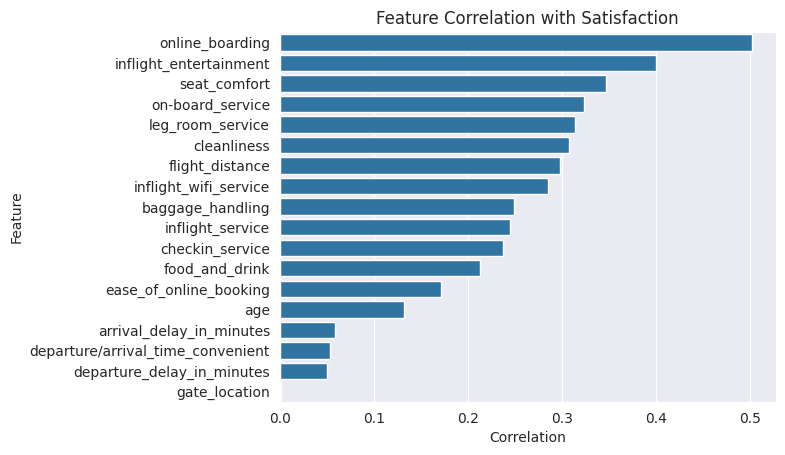

In [24]:
# calculate correlation and sort
correlation_df = (
    df_full_train[numeric_columns]
    .corrwith(df_full_train.satisfaction)
    .abs()
    .sort_values(ascending=False)
    .reset_index()
)

correlation_df.columns = ['Feature', 'Correlation']

sns.barplot(data=correlation_df, x='Correlation', y='Feature')

plt.title('Feature Correlation with Satisfaction');

The most useful Features are Online Boarding, Inflight Entertainment, Seat Comfort, On-Board Service, Leg Room Service and Cleanliness. The airlines should put more effort into making sure that these services are provided at the highest level possible.

In [25]:
# selected_columns = ['class', 'type_of_travel',  'online_boarding', 'inflight_entertainment', 'seat_comfort', 'on-board_service', 'leg_room_service', 'cleanliness', 'flight_distance', 'inflight_wifi_service', 'baggage_handling', 'inflight_service', 'checkin_service', 'food_and_drink']

In [ ]:
# finction to train and score models
def train_score(columns, C=[1.0]):

   # initialize list to hold scores
    scores_list = []

    for c in C:
        dv = DictVectorizer(sparse=False)

        # Transform training data
        train_dict = df_train[columns].to_dict(orient='records')
        X_train = dv.fit_transform(train_dict)

        # Transform validation data
        val_dict = df_val[columns].to_dict(orient='records')
        X_val = dv.transform(val_dict)

        # train the logistic regression model
        model = LogisticRegression(solver='liblinear', C=c)
        model.fit(X_train, y_train)

        # predict probabilities
        y_pred = model.predict_proba(X_val)[:, 1]

        # prepare the actual positive and negative arrays
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        # define thresholds
        thresholds = np.linspace(0, 1, 21)

        # iterate over thresholds and calculate scores
        for t in thresholds:
            predict_positive = (y_pred >= t)
            predict_negative = (y_pred < t)

            tp = (predict_positive & actual_positive).sum()
            fp = (predict_positive & actual_negative).sum()
            fn = (predict_negative & actual_positive).sum()

            # precision, recall and f1 scores
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0

            f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

            # calculate accuracy
            accuracy = accuracy_score(y_val, predict_positive)

            # append to scores list
            scores_list.append({
                'c':c,
                'threshold': t,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1_score': f1_score,
            })

        # convert the list of scores to a DataFrame
    df_scores = pd.DataFrame(scores_list, columns=['c','threshold', 'accuracy', 'precision', 'recall', 'f1_score', 'auc'])

    return df_scores

In [27]:
c = [0.000001, 0.001, 1]

In [28]:
# train the data on different C
df_scores = train_score(df_train.columns, C=c)

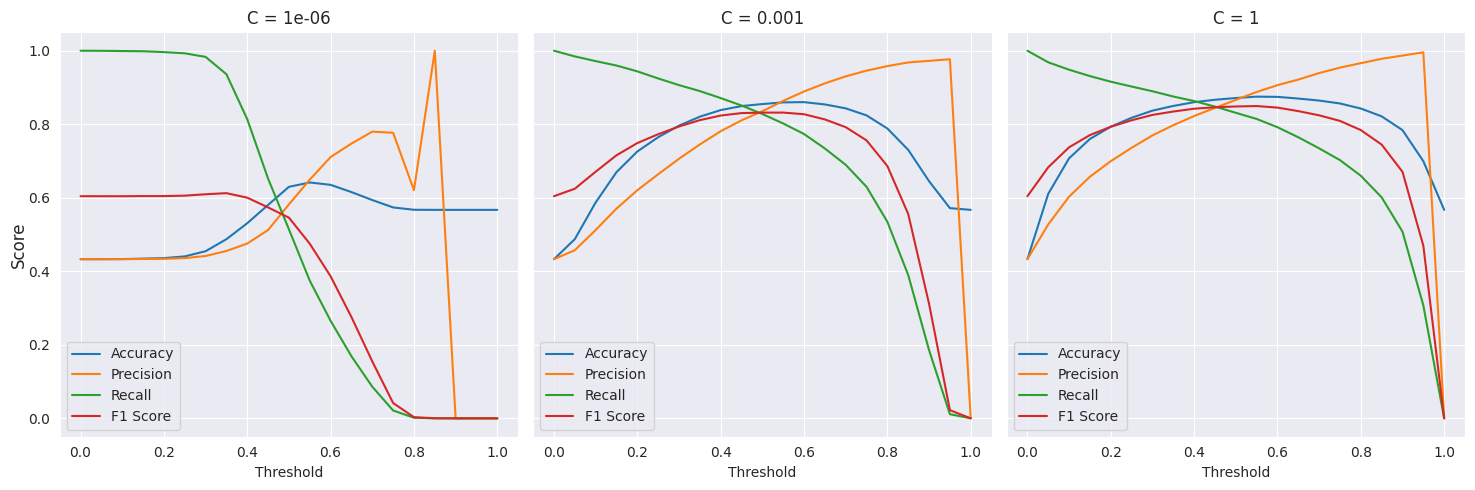

In [29]:
# create a figure with subplots for each C
fig, axes = plt.subplots(1, len(c), figsize=(15, 5), sharey=True)

if len(c) == 1:
    axes = [axes]

# loop through each value of C and corresponding subplot
for i, c in enumerate(c):
    ax = axes[i] 
    subset = df_scores[df_scores['c'] == c]

    ax.plot(subset.threshold, subset.accuracy, label='Accuracy')
    ax.plot(subset.threshold, subset.precision, label='Precision')
    ax.plot(subset.threshold, subset.recall, label='Recall')
    ax.plot(subset.threshold, subset.f1_score, label='F1 Score')

    ax.set_xlabel('Threshold')
    ax.set_title(f'C = {c}')
    ax.legend()

fig.supylabel('Score')
fig.tight_layout()

plt.show()

Using C of 0.001 to create final Logistic Regression Model. Test with threshold of 0.5

In [30]:
# initialize the dict vectorizer for the rest of the models
dv = DictVectorizer(sparse=False)

# transform training data
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

# transform validation data
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [31]:
# train the logistic regression model
lr_model = LogisticRegression(solver='liblinear', C=0.001)
lr_model.fit(X_train, y_train)

       

LogisticRegression(C=0.001, solver='liblinear')

In [32]:
def print_scores(model, t):
    # predict probabilities
    y_pred = model.predict_proba(X_val)[:, 1]

    # prepare the actual positive and negative arrays
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    # precision, recall and f1 scores
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    # calculate accuracy
    accuracy = accuracy_score(y_val, predict_positive)
    roc = roc_auc_score(y_val, y_pred)

    return accuracy, f1_score, roc



In [33]:
accuracy, f1_score, roc = print_scores(lr_model, 0.5)
print(f'Accuracy: {round(accuracy,4)} \nF1 Score: {round(f1_score,4)} \nROC: {round(roc,4)}')

Accuracy: 0.8549 
F1 Score: 0.8316 
ROC: 0.9137


#### Decision Tree Classifier

In [34]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

# iterate over the depths
for depth in depths: 
    # train the decision tree
    dt_model = DecisionTreeClassifier(max_depth=depth)
    dt_model.fit(X_train, y_train)
    
    # predict probabilities
    y_pred = dt_model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    # print depth and auc
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.790
   2 -> 0.873
   3 -> 0.927
   4 -> 0.953
   5 -> 0.967
   6 -> 0.976
  10 -> 0.984
  15 -> 0.968
  20 -> 0.952
None -> 0.943


Optimum dept lies between 4 and 6

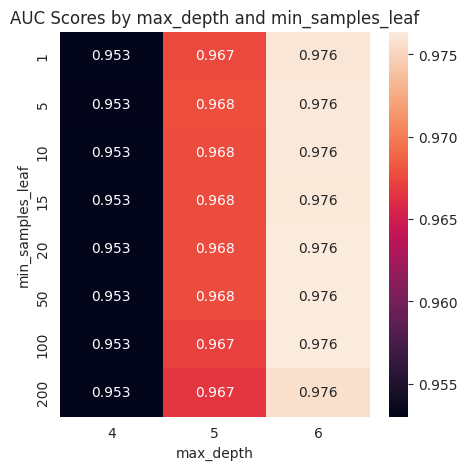

In [35]:
# list to store results
scores = []

# iterate over max_depth and min_samples_leaf
for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        # train the Decision Tree model
        dt_model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt_model.fit(X_train, y_train)

        # predict probabilities and compute AUC
        y_pred = dt_model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((depth, s, auc))


df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])

# pivot the DataFrame for heatmap visualization
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns='max_depth', values='auc')

# plot the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")
plt.title('AUC Scores by max_depth and min_samples_leaf')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.show()

Optimum mim_samples_leaf lies between 1 and 200 but we would use 15 for the final model

In [36]:
# train the decision tree using optimum values
dt_model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [37]:
accuracy, f1_score, roc = print_scores(dt_model, 0.5)
print(f'Accuracy: {round(accuracy,4)} \nF1 Score: {round(f1_score,4)} \nROC: {round(roc,4)}')

Accuracy: 0.9193 
F1 Score: 0.9082 
ROC: 0.9762


### Random Forest Classifier

In [38]:
scores = []

# iterate over different depths
for d in [5, 10, 15]:
    # iterate over different estimators
    for n in range(10, 201, 10):
        # train the random forest model
        rf_model = RandomForestClassifier(n_estimators=n,
                                    max_depth=d)
        rf_model.fit(X_train, y_train)

        # predict the probability
        y_pred = rf_model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'auc'])

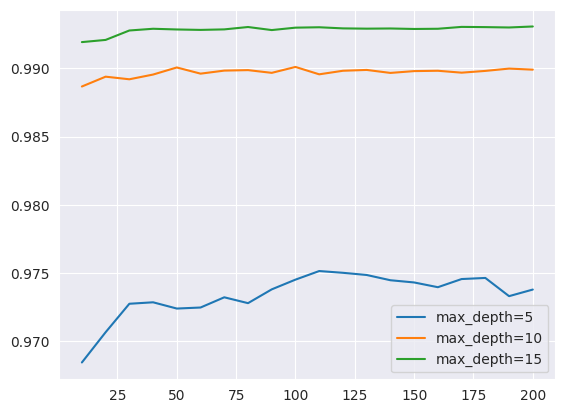

In [39]:
# plot line for each depth
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend();

In [40]:
# optimum depth
max_depth = 15

In [41]:
scores = []

# iterate over different min_samples_leaf
for s in [1, 3, 5, 10, 50]:
    # iterate over different estimators
    for n in range(10, 201, 10):
        
        # train the random forest model
        rf_model = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s)
        rf_model.fit(X_train, y_train)

        # predict the probability
        y_pred = rf_model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

df_scores = pd.DataFrame(scores, columns=['min_samples_leaf', 'n_estimators', 'auc'])

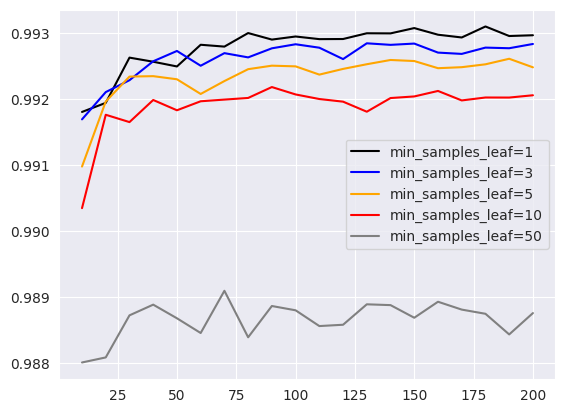

In [42]:
# plot for different min_samples_leaf
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [43]:
# optimum min_sample_leaf
min_samples_leaf=1

In [44]:
# train the optimum random forest model
rf_model = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=200)

In [45]:
accuracy, f1_score, roc = print_scores(rf_model, 0.5)
print(f'Accuracy: {round(accuracy,4)} \nF1 Score: {round(f1_score,4)} \nROC: {round(roc,4)}')

Accuracy: 0.9592 
F1 Score: 0.9524 
ROC: 0.9932


In [46]:
model_dict = {
    lr_model:'Logistic Regression',
    dt_model:'Decision Tree',
    rf_model:'Random Forest Model'
}

In [47]:
model_scores = []
for key, values in model_dict.items():
    accuracy, f1_score, roc = print_scores(key, 0.5)
    model_scores.append({
        "Model Name":values,
        "Accuracy":round(accuracy, 4),
        "F1 Score":round(f1_score, 4),
        "ROC": round(roc, 4)
    })

model_scores_df = pd.DataFrame(model_scores, columns=['Model Name', 'Accuracy', 'F1 Score', 'ROC'])

In [48]:
model_scores_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

,Model Name,Accuracy,F1 Score,ROC
0,Random Forest Model,0.9592,0.9524,0.9932
1,Decision Tree,0.9193,0.9082,0.9762
2,Logistic Regression,0.8549,0.8316,0.9137


In [50]:
# save the model to the highes scores
# import pickle
# output_file = f'rf_model.bin'

# f_out = open(output_file, 'wb') 
# pickle.dump((dv, rf_model), f_out)
# f_out.close()